# HOMEWORK 3
For this homework you are going to implement the unsharp masking filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia page for more details.

### Unsharp Masking (USP)

The USM technique consists of the following steps:

* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain weight) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [144]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

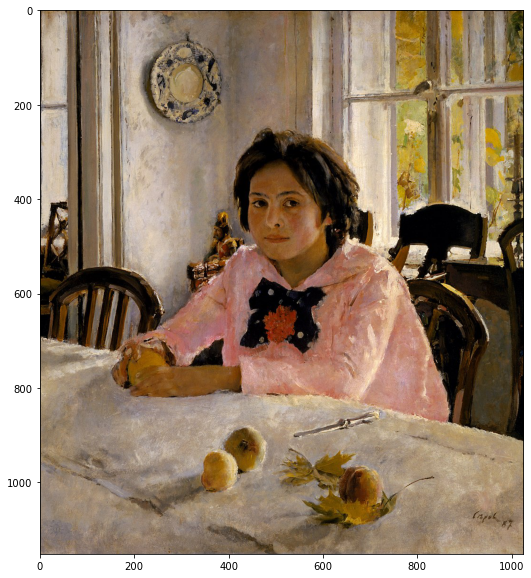

In [145]:
img = cv2.imread('../data/source3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

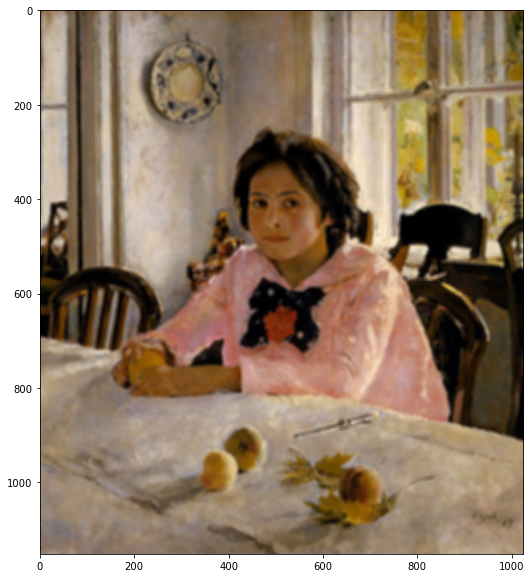

In [146]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(9, 9), sigmaX=7, borderType=cv2.BORDER_REPLICATE)
plt.imshow(unsharp)

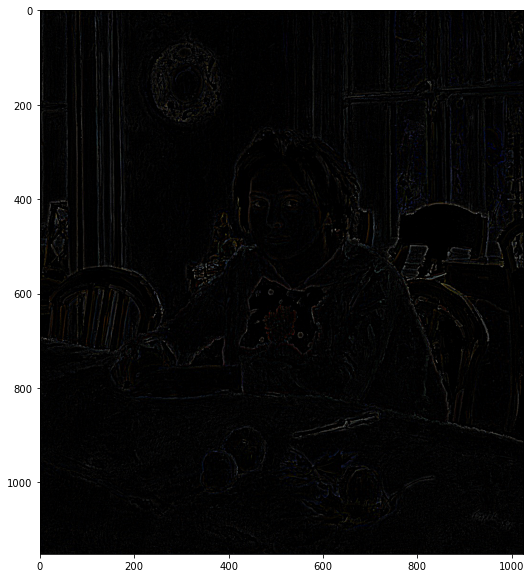

In [147]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = cv2.subtract(img, unsharp)
plt.imshow(diff)

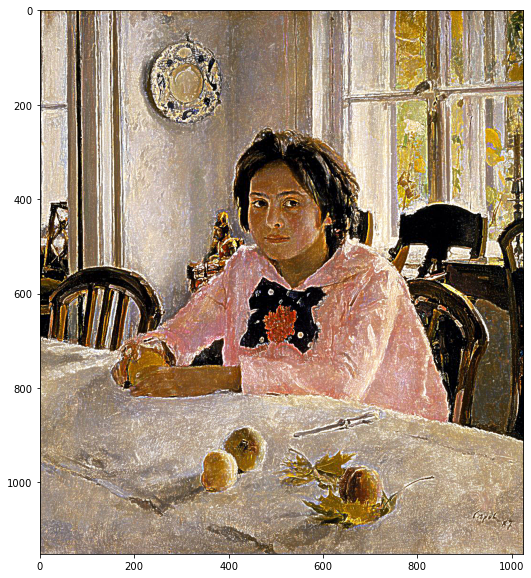

In [149]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 5
sharpened = cv2.addWeighted(img, 1, diff, amount, 0)
plt.imshow(sharpened)

# Questions
* What is a good (reasonable) value for the amount parameter?

Мне кажутся хорошими значения примерно **[0.3, 7]**

* What happens if it is too small?

Чем ближе значение к 0, тем более мягким и незаметным будет выделение краев, т.е тем легче будет действовать применяемый фильтр. При значении 0 изображение не изменяется.

* What happens if it is too large?

Чем больше значение, тем более острыми становятся любые градиенты на изображении, при больших значениях все больше его засвечивая (чем больше прибавляем, тем больше получаем белого), при этом выделяются (засвечиваются) не только значимые границы, но и шум.
